In [1]:
import os
os.system("pip install sklearn")
os.system("pip install mlxtend")
os.system("pip install statsmodels")
os.system("pip install plotly")
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sea
import statsmodels.api as sm
from scipy import stats
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn import svm
from sklearn import metrics
from sklearn import preprocessing

In [2]:
import pandas as pd
import numpy as np
import pydotplus 
import io
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import misc
import xgboost as xgb
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
#from sklearn.model_selection import CridSearchCV
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix

%matplotlib inline


url = 'https://raw.githubusercontent.com/firasm/PIMS-BCFSA/master/New_Sample_Clean_latest.csv'
#url ='https://raw.githubusercontent.com/shughestr/PIMS_2020_Real_Estate_data/master/sample_clean.csv'
  
df = pd.read_csv(url, error_bad_lines=False)
df=df.dropna()
# in this step, we removed 2 columns 
for col in df.columns:
    if len(df[col].unique())==1:
        df.drop(col,inplace=True,axis=1)

        

In [3]:
from itertools import product

def check_cardinality(df):

    combinations_lst = list(product(df.columns, df.columns))
    relations = ['one_to_one', 'one_to_many', 'many_to_one']

    output = []
    for col1, col2 in combinations_lst:
        for relation in relations:
            try:
                pd.merge(df[[col1]], df[[col2]], left_on=col1, right_on=col2, validate=relation)
                output.append([col1, col2, relation])
            except:
                continue

    return output




In [4]:
def get_relation(df, col1, col2):        
    first_max = df[[col1, col2]].groupby(col1).count().max()[0]
    second_max = df[[col1, col2]].groupby(col2).count().max()[0]
    if first_max==1:
        if second_max==1:
            return 'one-to-one'
        else:
            return 'one-to-many'
    else:
        if second_max==1:
            return 'many-to-one'
        else:
            return 'many-to-many'

from itertools import product
for col_i, col_j in product(df.columns, df.columns):
    if col_i == col_j:
        continue
    print(col_i, col_j, get_relation(df, col_i, col_j))

Unnamed: 0 ADDRESS one-to-many
Unnamed: 0 ASSESSED_VALUE one-to-many
Unnamed: 0 COMM_CODE one-to-many
Unnamed: 0 COMM_NAME one-to-many
Unnamed: 0 LATITUDE one-to-many
Unnamed: 0 LONGITUDE one-to-many
Unnamed: 0 ROLL_NUMBER one-to-many
Unnamed: 0 Year one-to-many
Unnamed: 0 location one-to-many
Unnamed: 0 fsa one-to-many
Unnamed: 0 pct_change one-to-many
Unnamed: 0 YEAR_OF_CONSTRUCTION one-to-many
Unnamed: 0 saf1 one-to-many
Unnamed: 0 saf2 one-to-many
Unnamed: 0 saf3 one-to-many
Unnamed: 0 saf4 one-to-many
Unnamed: 0 saf5 one-to-many
Unnamed: 0 saf6 one-to-many
Unnamed: 0 saf7 one-to-many
Unnamed: 0 saf8 one-to-many
Unnamed: 0 mr5y one-to-many
Unnamed: 0 Inflation one-to-many
Unnamed: 0 pop1 one-to-many
Unnamed: 0 pop2 one-to-many
Unnamed: 0 pop3 one-to-many
Unnamed: 0 pop4 one-to-many
Unnamed: 0 pop5 one-to-many
Unnamed: 0 pop6 one-to-many
Unnamed: 0 lan1 one-to-many
Unnamed: 0 lan2 one-to-many
Unnamed: 0 inc1 one-to-many
Unnamed: 0 inc2 one-to-many
Unnamed: 0 inc3 one-to-many
Unnamed

In [5]:
df['pct_change_bin']=pd.cut(df['pct_change'], bins=np.linspace(df['pct_change'].quantile(0.01), df['pct_change'].quantile(0.99), 11),labels=range(0,10))
df=df.dropna()

In [49]:
#df.isnull().values.any()


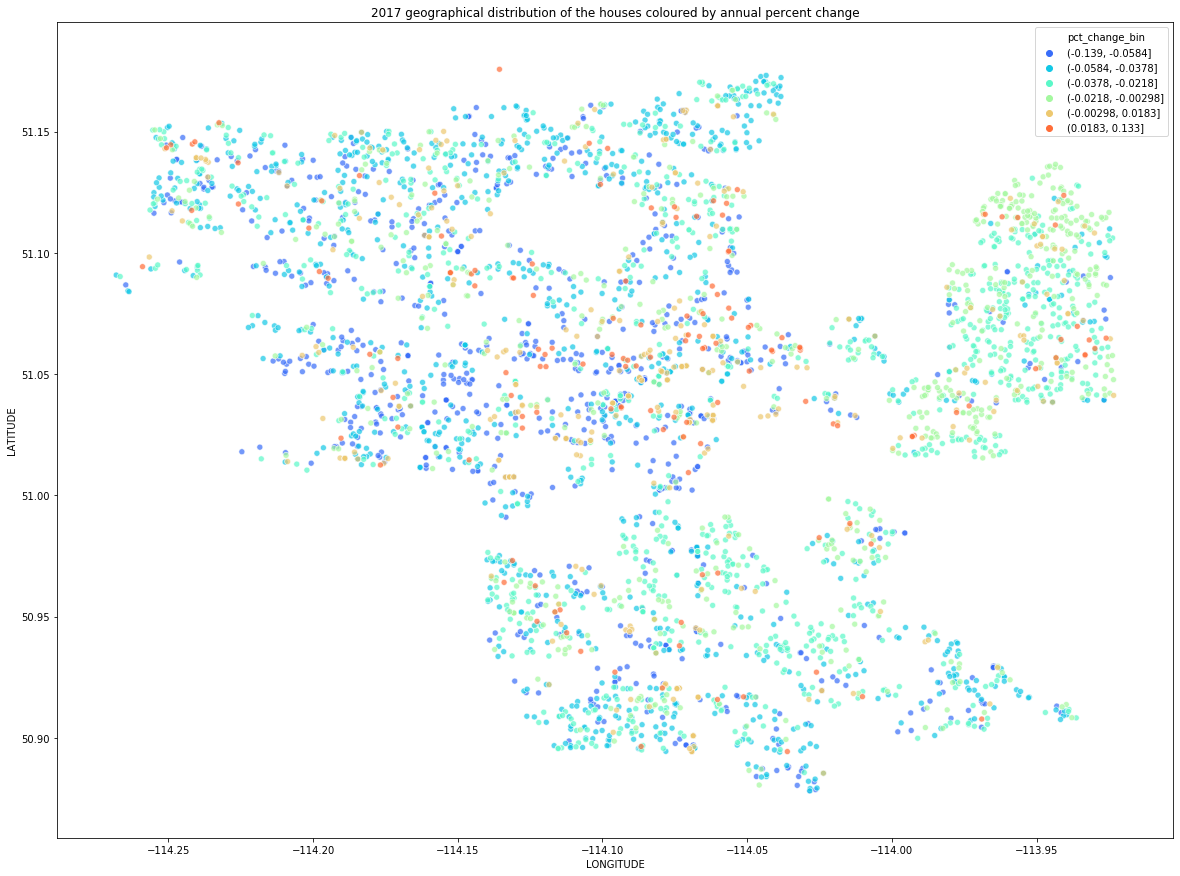

In [50]:
df['pct_change_bin'] = pd.qcut(df['pct_change'], q=6)

df=df.sort_values('pct_change_bin')

sns.set_palette("rainbow")

fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('2017 geographical distribution of the houses coloured by annual percent change')
sns.scatterplot(x= 'LONGITUDE', y='LATITUDE', data = df[df['Year'] == 2017], hue = 'pct_change_bin', ax=ax ,alpha=0.7)

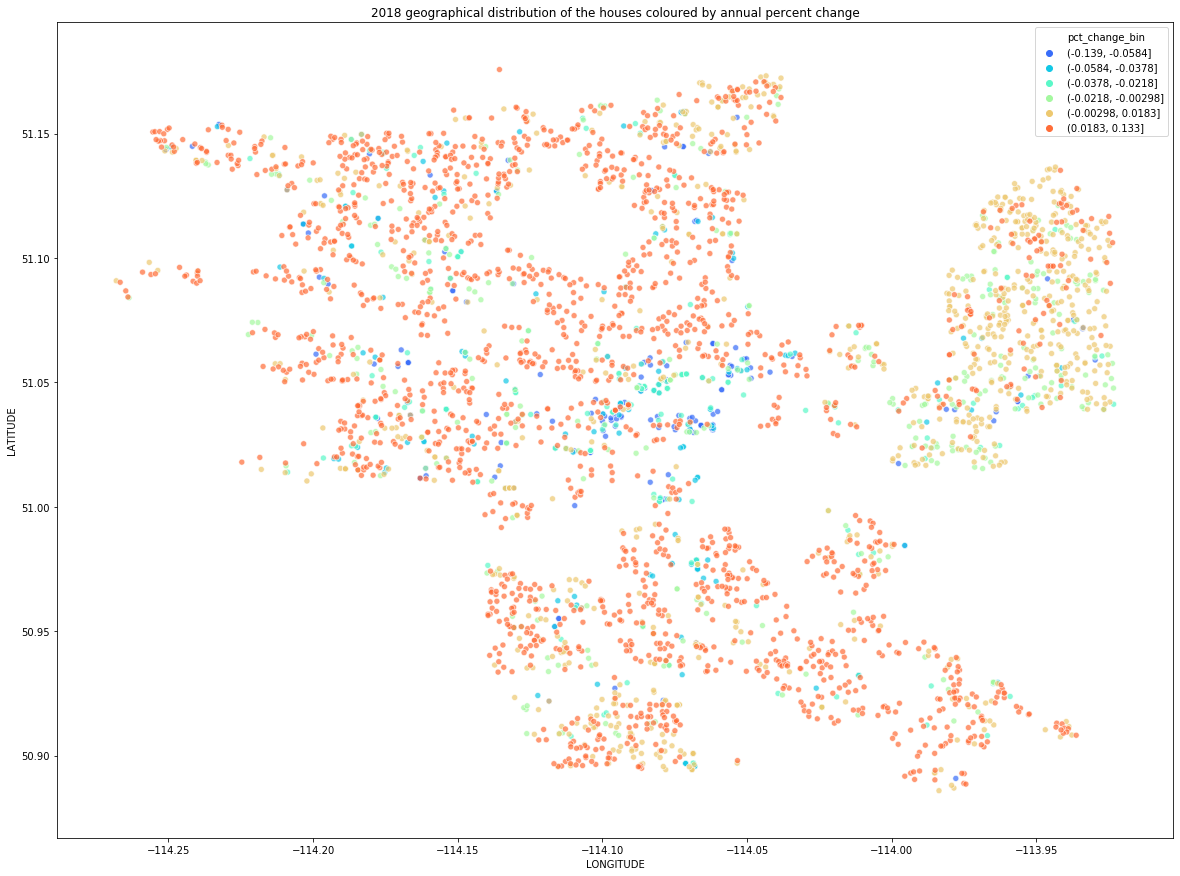

In [51]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('2018 geographical distribution of the houses coloured by annual percent change')
sns.scatterplot(x= 'LONGITUDE', y='LATITUDE', data = df[df['Year'] == 2018], hue = 'pct_change_bin', ax=ax, alpha=0.7)

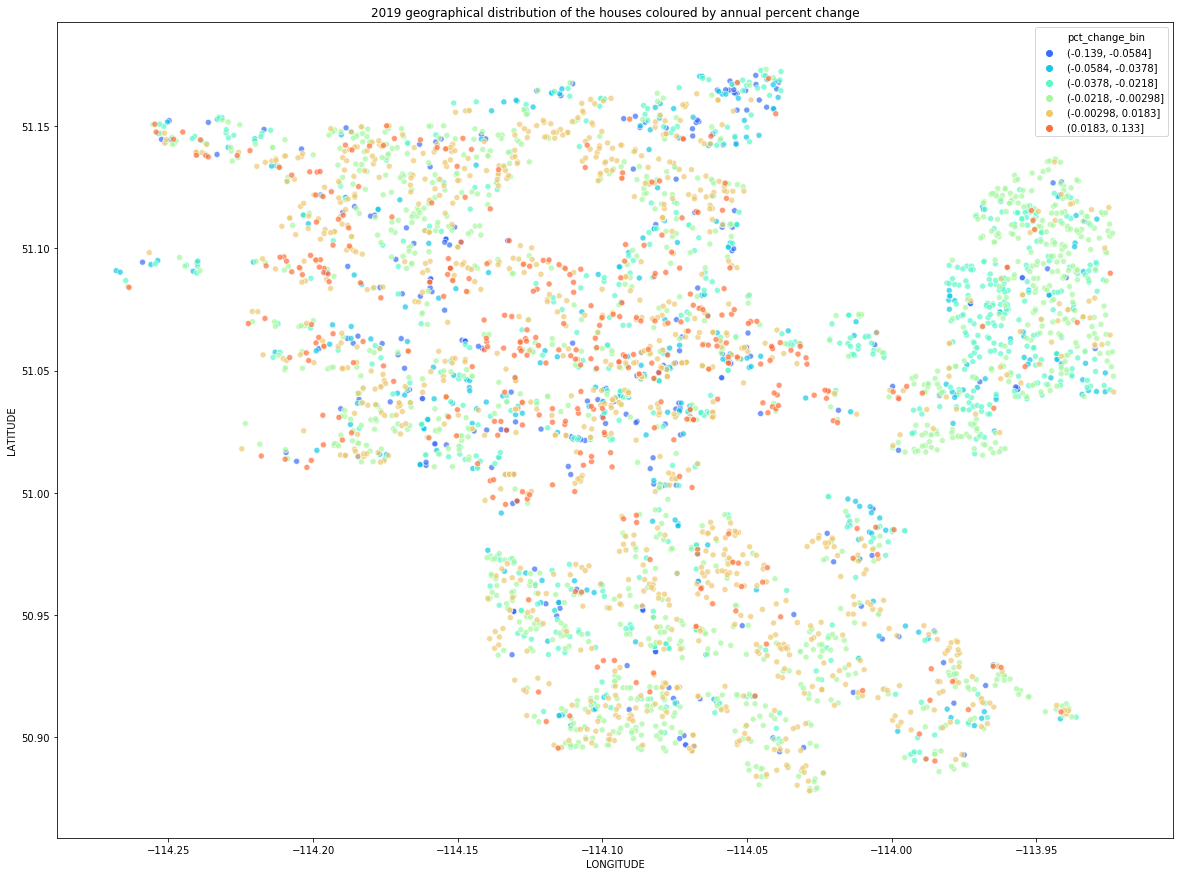

In [52]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('2019 geographical distribution of the houses coloured by annual percent change')
sns.scatterplot(x= 'LONGITUDE', y='LATITUDE', data = df[df['Year'] == 2019], hue = 'pct_change_bin', ax=ax, alpha=0.7)

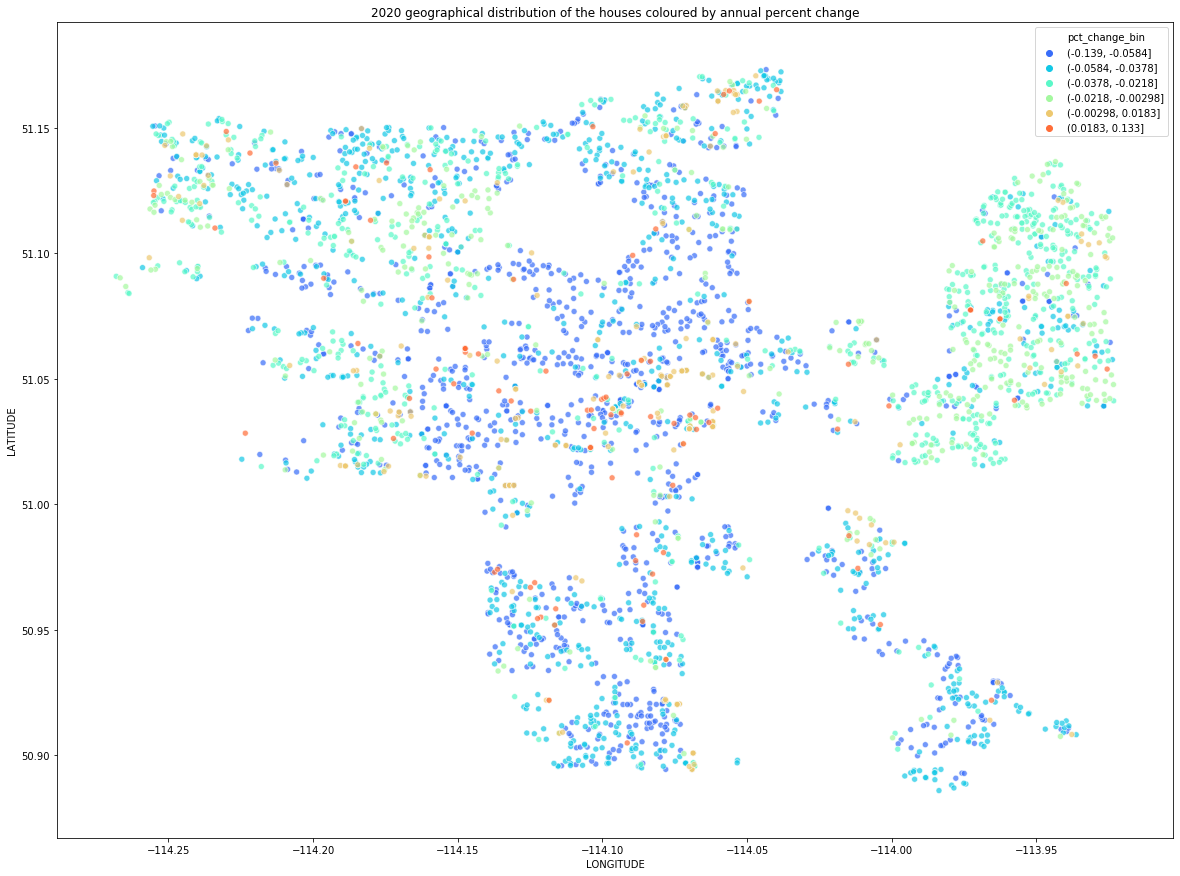

In [53]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('2020 geographical distribution of the houses coloured by annual percent change')
sns.scatterplot(x= 'LONGITUDE', y='LATITUDE', data = df[df['Year'] == 2020], hue = 'pct_change_bin', ax=ax, alpha=0.7)

Text(0.5, 0, 'Year')

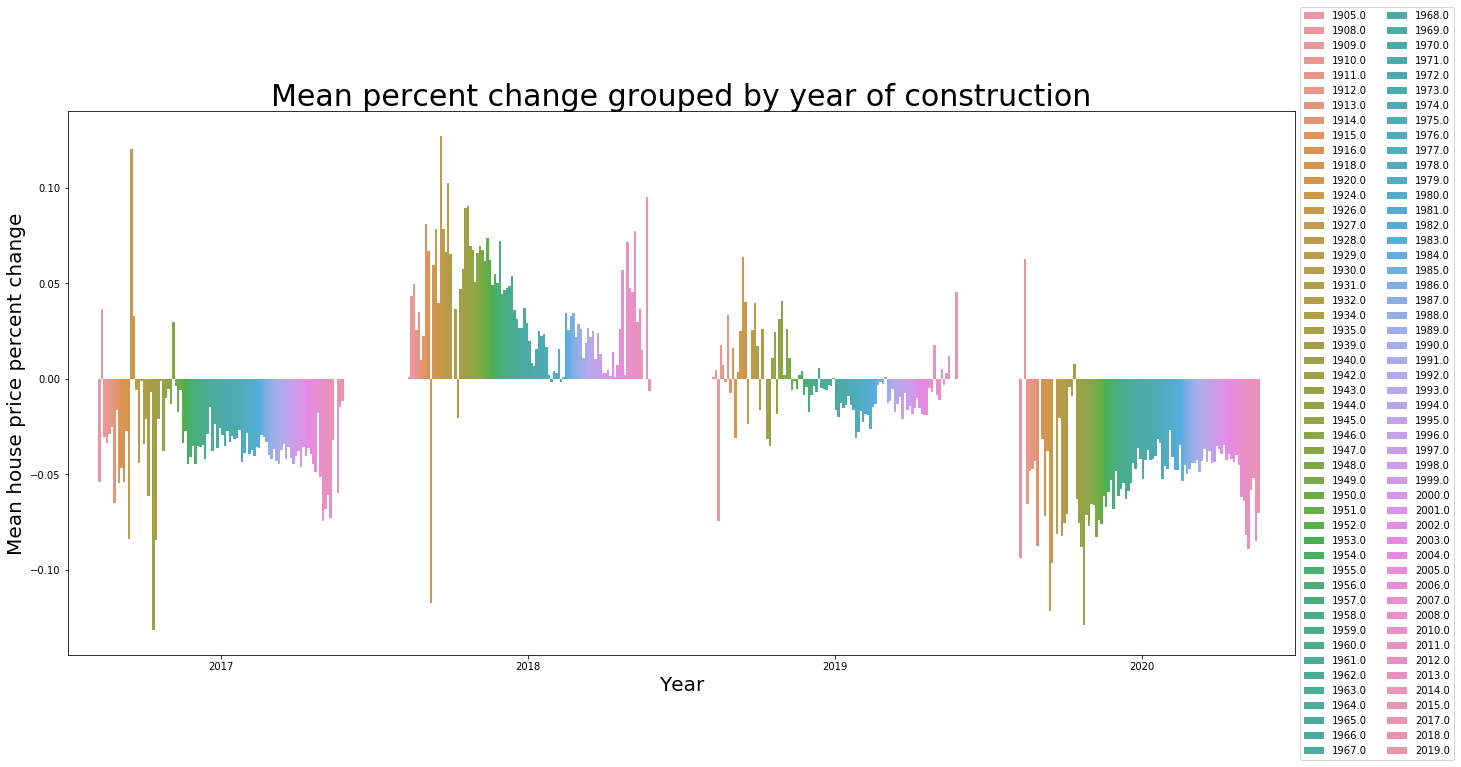

In [54]:
fig, ax = plt.subplots(figsize=(22, 10))
ax.set_title('Mean percent change grouped by year of construction', fontsize = 30)
sns.barplot(data = df, x = 'Year', y = 'pct_change', hue = 'YEAR_OF_CONSTRUCTION', estimator = np.mean, ci=None).legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=2)
ax.set_ylabel('Mean house price percent change', fontsize = 20)
ax.set_xlabel('Year', fontsize = 20)

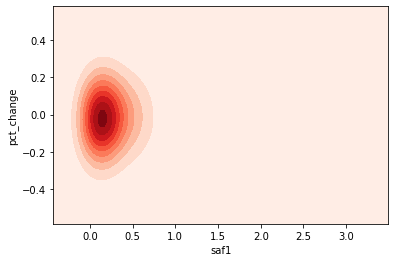

In [55]:
sns.kdeplot(df['saf1'], df['pct_change'], cmap="Reds", shade=True, bw=.15)
#sns.scatterplot(x= 'LONGITUDE', y='LATITUDE', data = df[df['Year'] == 2020], hue = 'pct_change_bin', ax=ax, alpha=0.7)

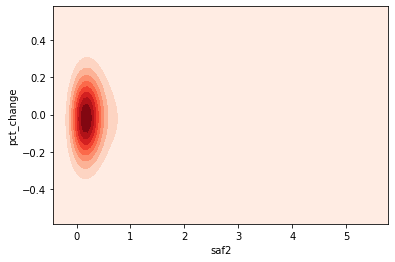

In [56]:
sns.kdeplot(df['saf2'], df['pct_change'], cmap="Reds", shade=True, bw=.15)


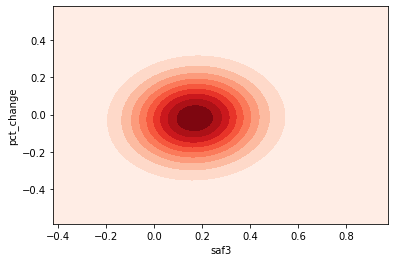

In [57]:
sns.kdeplot(df['saf3'], df['pct_change'], cmap="Reds", shade=True, bw=.15)



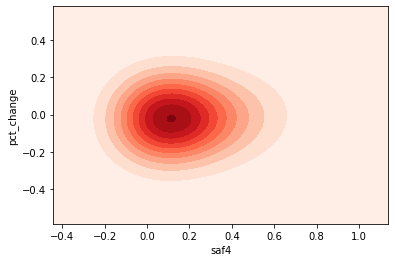

In [58]:
sns.kdeplot(df['saf4'], df['pct_change'], cmap="Reds", shade=True, bw=.15)


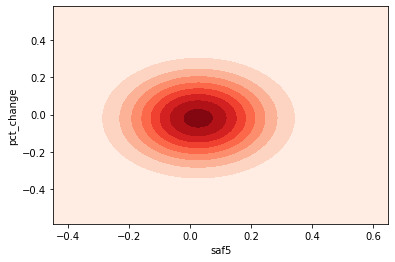

In [59]:
sns.kdeplot(df['saf5'], df['pct_change'], cmap="Reds", shade=True, bw=.15)


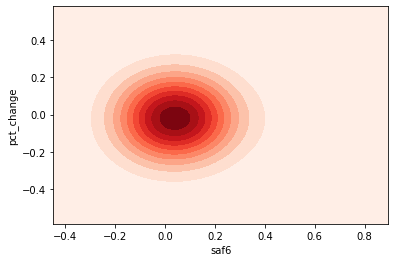

In [60]:
sns.kdeplot(df['saf6'], df['pct_change'], cmap="Reds", shade=True, bw=.15)


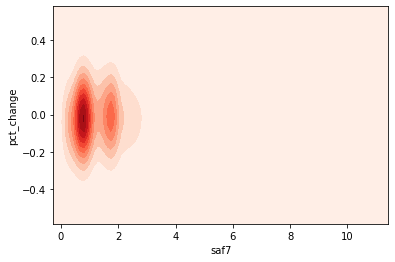

In [61]:
sns.kdeplot(df['saf7'], df['pct_change'], cmap="Reds", shade=True, bw=.15)


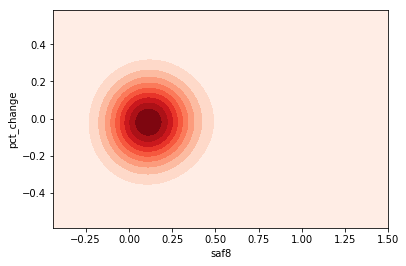

In [53]:
sns.kdeplot(df['saf8'], df['pct_change'], cmap="Reds", shade=True, bw=.15)

In [37]:
df.keys()

Index(['Unnamed: 0', 'ADDRESS', 'ASSESSED_VALUE', 'COMM_CODE', 'COMM_NAME',
       'LATITUDE', 'LONGITUDE', 'ROLL_NUMBER', 'Year', 'location', 'fsa',
       'pct_change', 'YEAR_OF_CONSTRUCTION', 'saf1', 'saf2', 'saf3', 'saf4',
       'saf5', 'saf6', 'saf7', 'saf8', 'mr5y', 'Inflation', 'pop1', 'pop2',
       'pop3', 'pop4', 'pop5', 'pop6', 'lan1', 'lan2', 'inc1', 'inc2', 'inc3',
       'inc4', 'own1', 'own2', 'own3', 'own4', 'lab1', 'lab2', 'lab3',
       'vacancy_rate', 'walk_score_comm', 'transit_score_comm',
       'bike_score_comm', 'comm_polulation', 'pct_change_bin'],
      dtype='object')

In [21]:
df_num = df.drop(['Unnamed: 0','ADDRESS','COMM_CODE','COMM_NAME','location','fsa','comm_polulation'],axis=1)


In [22]:
from sklearn import preprocessing
x=df_num.drop(['ASSESSED_VALUE','pct_change','Year','pct_change_bin'],axis=1).values
#min_max_scaler=preprocessing.MinMaxScaler()
#x_scaled=min_max_scaler.fit_transform(x)


standard_scaler=preprocessing.StandardScaler()
x_scaled=standard_scaler.fit_transform(x)


df_scaled=pd.DataFrame(x_scaled,columns=df_num.drop(['ASSESSED_VALUE','pct_change','Year','pct_change_bin'],axis=1).columns)
#df_scaled['ASSESSED_VALUE']=df_num['ASSESSED_VALUE']

df_scaled[['ASSESSED_VALUE','pct_change','Year','pct_change_bin']]=df_num[['ASSESSED_VALUE','pct_change','Year','pct_change_bin']]

df_scaled=df_scaled.dropna()




In [23]:
#df_scaled.dropna().shape
#df_scaled[['ASSESSED_VALUE','pct_change','Year','pct_change_bin']].isnull().values.any()
#df_num[['ASSESSED_VALUE','pct_change','Year','pct_change_bin']].isnull().values.any()
#df_scaled.isnull().values.any()

Text(0, 0.5, 'cumulative explained variance')

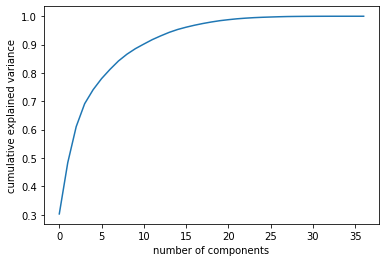

In [24]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_scaled.drop(['ASSESSED_VALUE','pct_change','Year','pct_change_bin'],axis=1).values)
ratio=np.cumsum(pca.explained_variance_ratio_)
plt.plot(ratio)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [25]:
x_train, x_test, y_train, y_test=train_test_split(df_scaled.drop(['ASSESSED_VALUE','pct_change'],axis=1),df_scaled['pct_change'],test_size=0.2,random_state=0)

In [26]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()
L.fit(x_train.drop(['pct_change_bin'],axis=1),y_train)




y_pred1=L.predict(x_test.drop(['pct_change_bin'],axis=1))

from sklearn.metrics import r2_score, mean_squared_error

print('R2 score', r2_score(y_test,y_pred1))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score 0.013513888321608158
RMSE 0.04304171678355579


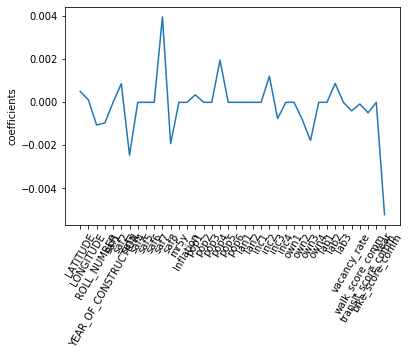

In [27]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.0001,normalize=False)
lasso_coef=lasso.fit(x_train.drop(['pct_change_bin'],axis=1),y_train).coef_
_=plt.plot(range(len(x_train.drop(['pct_change_bin'],axis=1).columns)),lasso_coef)
names=x_train.drop(['pct_change_bin'],axis=1).columns
_=plt.xticks(range(len(names)),names,rotation=60)
_=plt.ylabel("coefficients")
plt.show()

0.043579659746554714

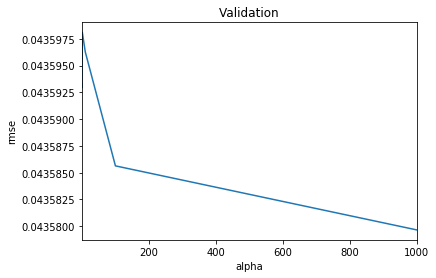

In [28]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV

from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, x_train.drop(['pct_change_bin'],axis=1),y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

alphas = [0.00001,0.0001,0.001,0.01, 0.1, 1, 10,100,1000]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

cv_ridge.min()

In [29]:
#model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_r, y_r)
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
model_lasso = LassoCV(alphas = [0.0001]).fit(x_train.drop(['pct_change_bin'],axis=1),y_train)
rmse_cv(model_lasso).mean()

coef_lasso = pd.Series(model_lasso.coef_, index = names)
print("Lasso picked " + str(sum(coef_lasso != 0)) + " variables and eliminated the other " +  str(sum(coef_lasso == 0)) + " variables")

Lasso picked 19 variables and eliminated the other 19 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

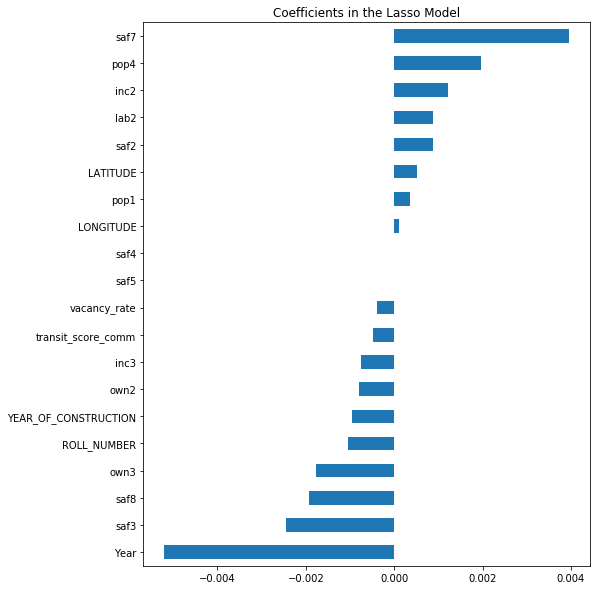

In [30]:
imp_coef = pd.concat([coef_lasso.sort_values().head(10),
                     coef_lasso.sort_values().tail(10)])
#imp_coef = pd.concat([coef_lasso.sort_values()])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

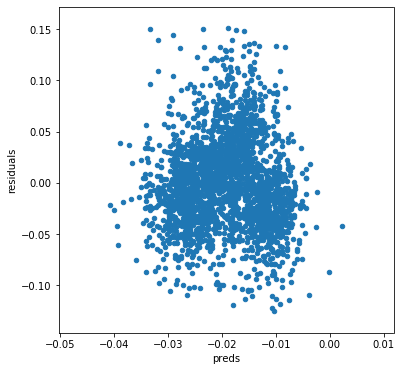

In [31]:
plt.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(x_test.drop(['pct_change_bin'],axis=1)), "true":y_test})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")




In [32]:
y_pred2 = model_lasso.predict(x_test.drop(['pct_change_bin'],axis=1))           
print(mean_squared_error(y_test, y_pred2))    

0.0018451622200800074


In [40]:
coef_lasso[coef_lasso!=0]


LATITUDE                0.000510
LONGITUDE               0.000114
ROLL_NUMBER            -0.001055
YEAR_OF_CONSTRUCTION   -0.000960
saf2                    0.000867
saf3                   -0.002455
saf7                    0.003967
saf8                   -0.001922
pop1                    0.000350
pop4                    0.001960
inc2                    0.001214
inc3                   -0.000753
own2                   -0.000804
own3                   -0.001774
lab2                    0.000876
vacancy_rate           -0.000398
walk_score_comm        -0.000078
transit_score_comm     -0.000484
Year                   -0.005219
dtype: float64

In [41]:
print(coef_lasso[coef_lasso!=0].index)

Index(['LATITUDE', 'LONGITUDE', 'ROLL_NUMBER', 'YEAR_OF_CONSTRUCTION', 'saf2',
       'saf3', 'saf7', 'saf8', 'pop1', 'pop4', 'inc2', 'inc3', 'own2', 'own3',
       'lab2', 'vacancy_rate', 'walk_score_comm', 'transit_score_comm',
       'Year'],
      dtype='object')


In [34]:
model_Ridge = RidgeCV(alphas = [0.0001]).fit(x_train.drop(['pct_change_bin'],axis=1),y_train)
rmse_cv(model_Ridge).mean()

coef_Ridge = pd.Series(model_Ridge.coef_, index = names)
print("Lasso picked " + str(sum(coef_Ridge != 0)) + " variables and eliminated the other " +  str(sum(coef_Ridge == 0)) + " variables")

Lasso picked 38 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

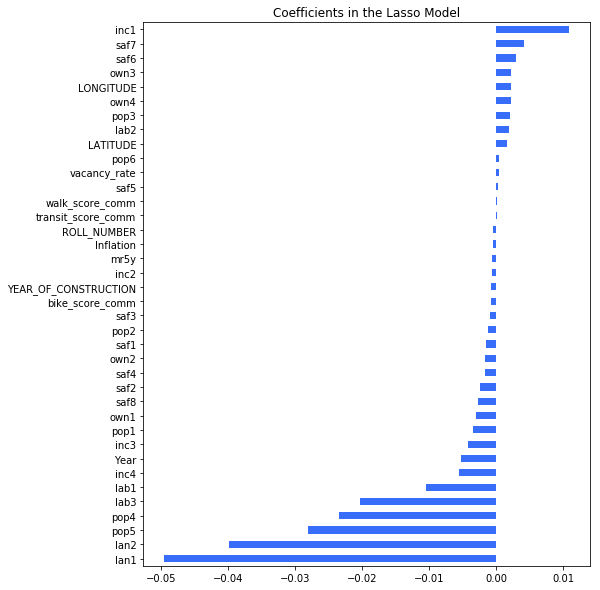

In [183]:
imp_coef = pd.concat([coef_Ridge.sort_values()])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


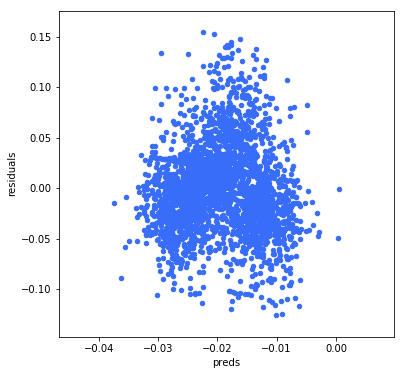

In [185]:
plt.rcParams['figure.figsize'] = (6.0, 6.0)

preds_r = pd.DataFrame({"preds":model_Ridge.predict(x_test.drop(['pct_change_bin'],axis=1)), "true":y_test})
preds_r["residuals"] = preds_r["true"] - preds_r["preds"]
preds_r.plot(x = "preds", y = "residuals",kind = "scatter")




In [187]:
y_pred3 = model_Ridge.predict(x_test.drop(['pct_change_bin'],axis=1))           
print(mean_squared_error(y_test, y_pred3))    

0.0018500800940693676


0.0018475400425305864

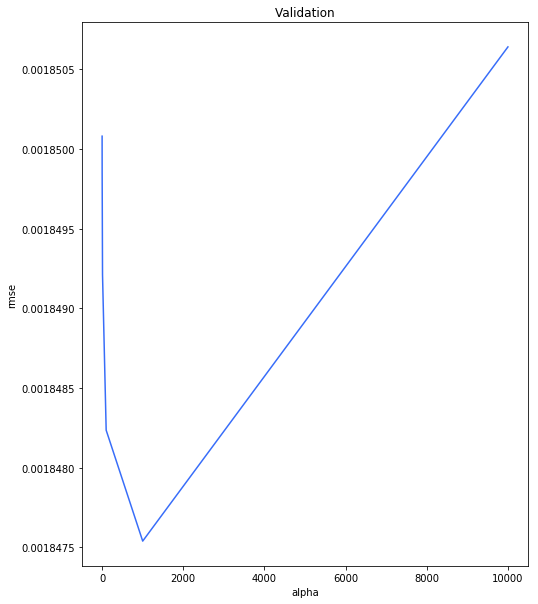

In [227]:
alphas = [0.00001,0.0001,0.001,0.01, 0.1, 1, 10,100,1000,10**4]
cv_ridge = []
for alpha in alphas:
    model_Ridge = RidgeCV(alphas = [alpha]).fit(x_train.drop(['pct_change_bin'],axis=1),y_train)
    y_pred3 = model_Ridge.predict(x_test.drop(['pct_change_bin'],axis=1))
    cv_ridge.append(mean_squared_error(y_test, y_pred3))
    
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse") 
cv_ridge.min()

0.00001       0.001850
0.00010       0.001850
0.00100       0.001850
0.01000       0.001850
0.10000       0.001850
1.00000       0.001850
10.00000      0.001849
100.00000     0.001848
1000.00000    0.001848
14.00000      0.001849
15.00000      0.001849
dtype: float64

## Wrappers Method
### Forward variable selection

In [16]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
df_scaled=df_scaled.dropna()
#df1=df.copy()

#df2=df1.drop(axis=1,columns=['Unnamed: 0','ADDRESS','ASSESSED_VALUE','ASSESSMENT_CLASS','ASSESSMENT_CLASS_DESCRIPTION','COMM_NAME','COMM_CODE','LATITUDE','LONGITUDE','location','fsa','pct_group','ROLL_NUMBER','Year','YEAR_OF_CONSTRUCTION','comm_polulation','y_bin'])
#df2=(df2-df2.mean())/df2.std()
C2=df_scaled.copy()
C2=C2.dropna()
C2=C2.drop(['pct_change','ROLL_NUMBER'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    C2.values[:,:-1],
    C2.values[:,-1:],
    test_size=0.2,
    random_state=0)


clf = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf,k_features = 15,forward=True,floating=False, scoring='r2',cv=15)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)
feat_cols = list(sfs1.k_feature_idx_)
C2.columns[feat_cols]

Index(['LATITUDE', 'LONGITUDE', 'YEAR_OF_CONSTRUCTION', 'saf2', 'saf3', 'saf7',
       'saf8', 'Inflation', 'pop4', 'pop5', 'own3', 'lab1', 'vacancy_rate',
       'ASSESSED_VALUE', 'Year'],
      dtype='object')

### Backward Feature Selection

In [19]:
df_o=df_scaled.copy()
df_o=df_o.dropna()
y_o=df_o['pct_change']
X_o=df_o.drop(['pct_change','ROLL_NUMBER','pct_change_bin'],axis=1)

#Fitting sm.OLS model
model = sm.OLS(y_o,X_o.astype(float)).fit()
model.pvalues

cols = list(X_o.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_o[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_o,X_1.astype(float)).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE[0:15])

['saf3', 'saf4', 'saf7', 'saf8', 'pop2', 'pop4', 'pop5', 'lan2', 'inc3', 'inc4', 'own4', 'ASSESSED_VALUE', 'Year']


# Filter Method : ANOVA and Regression
Using Anova to Find Out 15 Most Important Varaibles when Doing Classification

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_o=df_scaled.copy()
#Dropped columns with NaN
df_o=df_o.dropna()
y_o=df_o['pct_change']
X_o=df_o.drop(['pct_change','ROLL_NUMBER','pct_change_bin'],axis=1)
#X_o = sc.fit_transform(X_r)
fvalue_selector = SelectKBest(f_regression,k=15)
X_kbest = fvalue_selector.fit_transform(X_o, y_o)
fvalue_selector.get_support([X_o.shape[1]])
#X_new = fvalue_selector.transform(X_o)
X_o.columns[fvalue_selector.get_support(indices=True)]

Index(['YEAR_OF_CONSTRUCTION', 'saf3', 'Inflation', 'pop4', 'pop5', 'pop6',
       'inc1', 'inc3', 'own1', 'lab1', 'lab2', 'lab3', 'vacancy_rate',
       'ASSESSED_VALUE', 'Year'],
      dtype='object')

###  Looking at the common features that have been seen in Lasso, ANOVA and Forward Feature Selection and Backward Feature Selection

In [44]:
from collections import Counter
Features=['YEAR_OF_CONSTRUCTION', 'saf3', 'Inflation', 'pop4', 'pop5', 'pop6',
       'inc1', 'inc3', 'own1', 'lab1', 'lab2', 'lab3', 'vacancy_rate',
       'ASSESSED_VALUE', 'Year','saf3', 'saf4', 'saf7', 'saf8', 'pop2', 'pop4', 'pop5', 'lan2', 'inc3', 'inc4', 'own4', 'ASSESSED_VALUE', 'Year','LATITUDE', 'LONGITUDE', 'YEAR_OF_CONSTRUCTION', 'saf2', 'saf3', 'saf7',
       'saf8', 'Inflation', 'pop4', 'pop5', 'own3', 'lab1', 'vacancy_rate',
       'ASSESSED_VALUE', 'Year','LATITUDE', 'LONGITUDE', 'ROLL_NUMBER', 'YEAR_OF_CONSTRUCTION', 'saf2',
       'saf3', 'saf7', 'saf8', 'pop1', 'pop4', 'inc2', 'inc3', 'own2', 'own3',
       'lab2', 'vacancy_rate', 'walk_score_comm', 'transit_score_comm',
       'Year']
Counter(Features)

Counter({'YEAR_OF_CONSTRUCTION': 3,
         'saf3': 4,
         'Inflation': 2,
         'pop4': 4,
         'pop5': 3,
         'pop6': 1,
         'inc1': 1,
         'inc3': 3,
         'own1': 1,
         'lab1': 2,
         'lab2': 2,
         'lab3': 1,
         'vacancy_rate': 3,
         'ASSESSED_VALUE': 3,
         'Year': 4,
         'saf4': 1,
         'saf7': 3,
         'saf8': 3,
         'pop2': 1,
         'lan2': 1,
         'inc4': 1,
         'own4': 1,
         'LATITUDE': 2,
         'LONGITUDE': 2,
         'saf2': 2,
         'own3': 2,
         'ROLL_NUMBER': 1,
         'pop1': 1,
         'inc2': 1,
         'own2': 1,
         'walk_score_comm': 1,
         'transit_score_comm': 1})